## Hands-on - Visualisation

Name: Kamonnun Silarat <br>
Date: 10.04.2025

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import shapiro

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/World-happiness-report-updated_2024.csv"

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")
print(df.head(5))

Dataset Preview:
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative a

### **Question 1: Create a histogram of the 'Life Ladder'**
#### Hint: Use plt.hist() or sns.histplot() to show distribution of a single variable

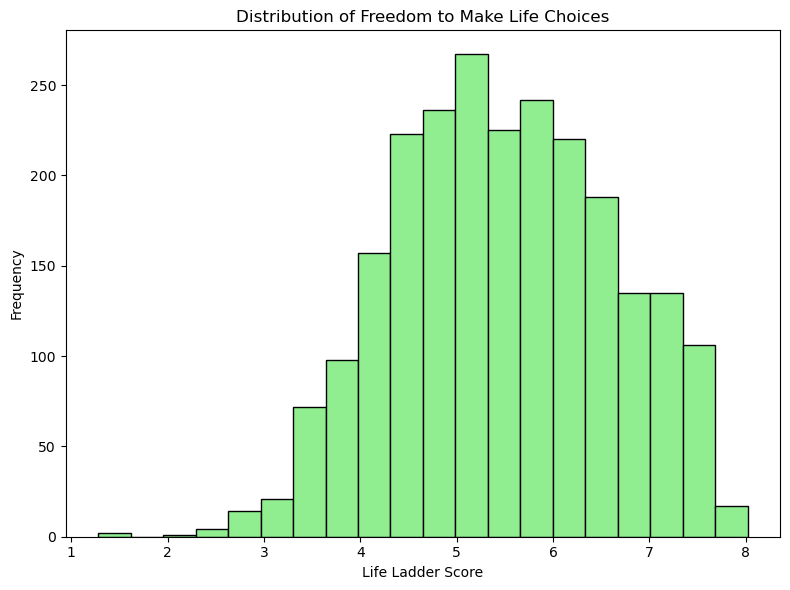

In [2]:
# Your code here:
plt.figure(figsize=(8, 6))
plt.hist(df['Life Ladder'], bins=20, color='lightgreen', edgecolor='black')

plt.title('Distribution of Freedom to Make Life Choices')
plt.xlabel('Life Ladder Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Question 2: Create a scatter plot of 'Log GDP per capita' vs 'Life Ladder'**
#### Hint: Use sns.scatterplot(x=..., y=...) or plt.scatter()

Log GDP per capita' vs. 'Life Ladder:


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
14,Afghanistan,2023,1.446,NaN,0.368,55.2,0.228,NaN,0.738,0.261,0.460
30,Albania,2023,5.445,9.689,0.691,69.2,0.872,0.068,0.855,0.597,0.314
63,Argentina,2023,6.393,9.994,0.892,67.3,0.832,-0.129,0.846,0.720,0.301
80,Armenia,2023,5.679,9.730,0.819,68.2,0.819,-0.179,0.681,0.575,0.423
97,Australia,2023,7.025,10.846,0.896,71.2,0.876,0.187,0.482,0.731,0.248
...,...,...,...,...,...,...,...,...,...,...,...
2295,Venezuela,2023,5.765,NaN,0.885,63.7,0.757,NaN,0.825,0.758,0.300
2313,Vietnam,2023,6.325,9.392,0.845,65.7,0.956,-0.159,0.655,0.710,0.120
2327,Yemen,2023,3.532,NaN,0.825,56.6,0.583,NaN,0.771,0.447,0.341
2344,Zambia,2023,3.686,8.115,0.664,56.1,0.854,0.092,0.814,0.653,0.359


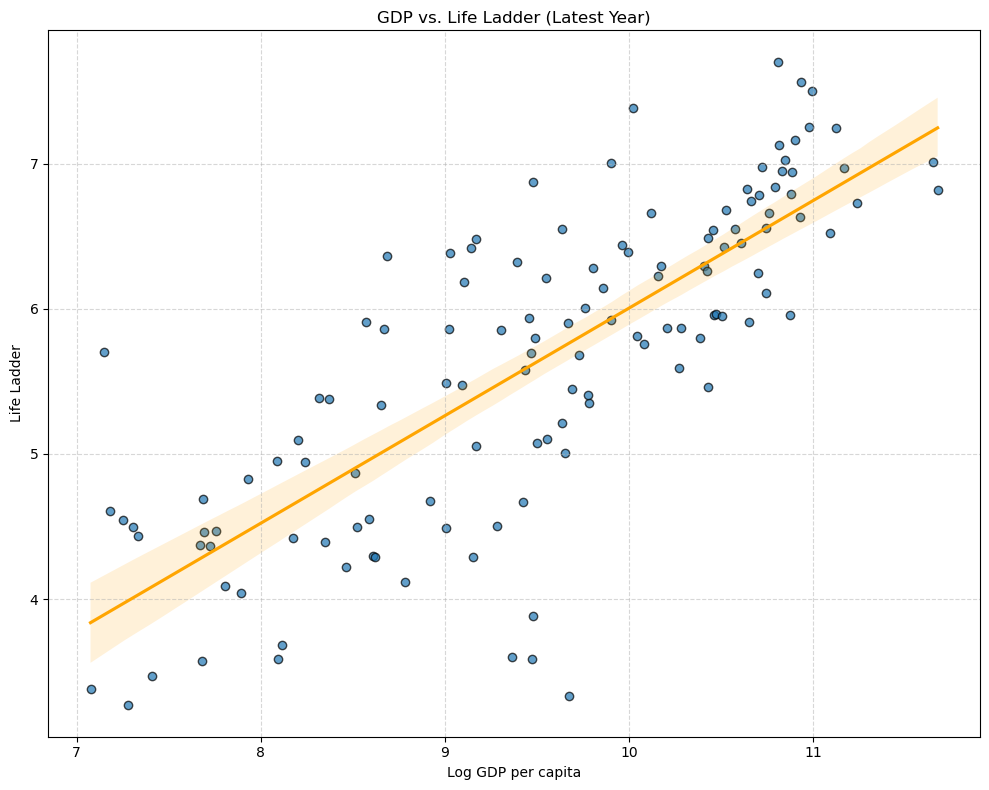

In [3]:
# Your code here:
df_latest = df[df['year'] == df['year'].max()]
print("Log GDP per capita' vs. 'Life Ladder:")
display(df_latest)

plt.figure(figsize=(10, 8))
sns.regplot(
    data=df_latest,
    x='Log GDP per capita',
    y='Life Ladder',
    scatter_kws={'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': 'orange'}
)

plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')
plt.title('GDP vs. Life Ladder (Latest Year)')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### **Question 3: Create a box plot to show distribution of 'Life Ladder' by 'year'**
#### Hint: Use sns.boxplot(x='Regional indicator', y='Life Ladder', data=df) and rotate x-labels for readability

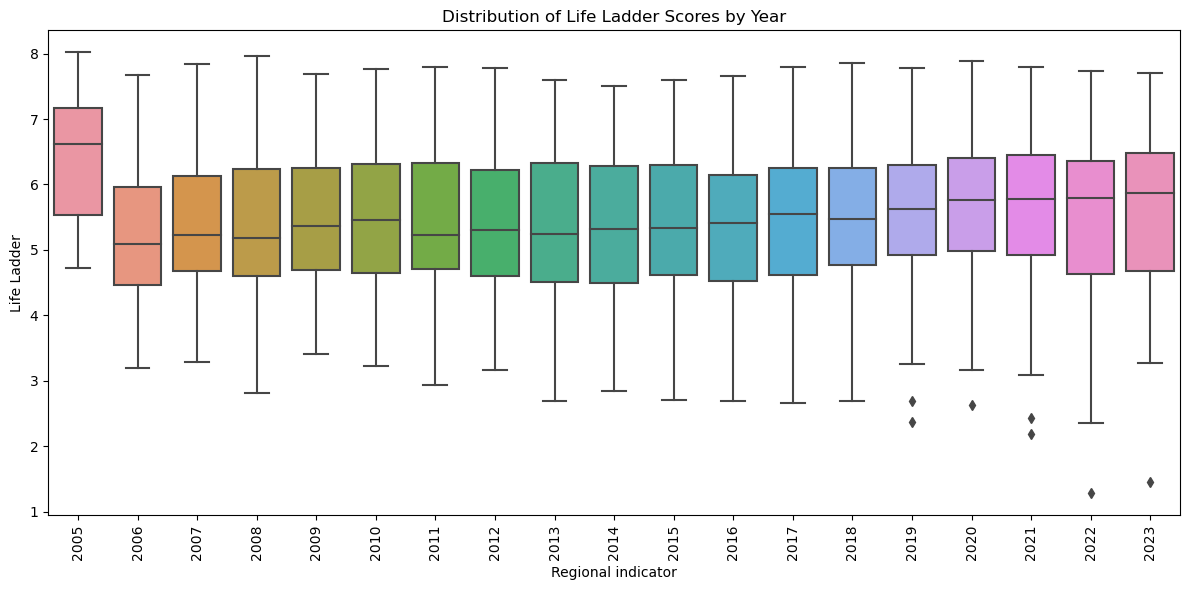

In [4]:
# Your code here:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='Life Ladder', data=df)
plt.title('Distribution of Life Ladder Scores by Year')

plt.xlabel('Regional indicator')
plt.ylabel('Life Ladder')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Question 4: Create a heatmap to show correlation between numerical features**
#### Hint: Use df.corr() to calculate correlation matrix, then sns.heatmap()

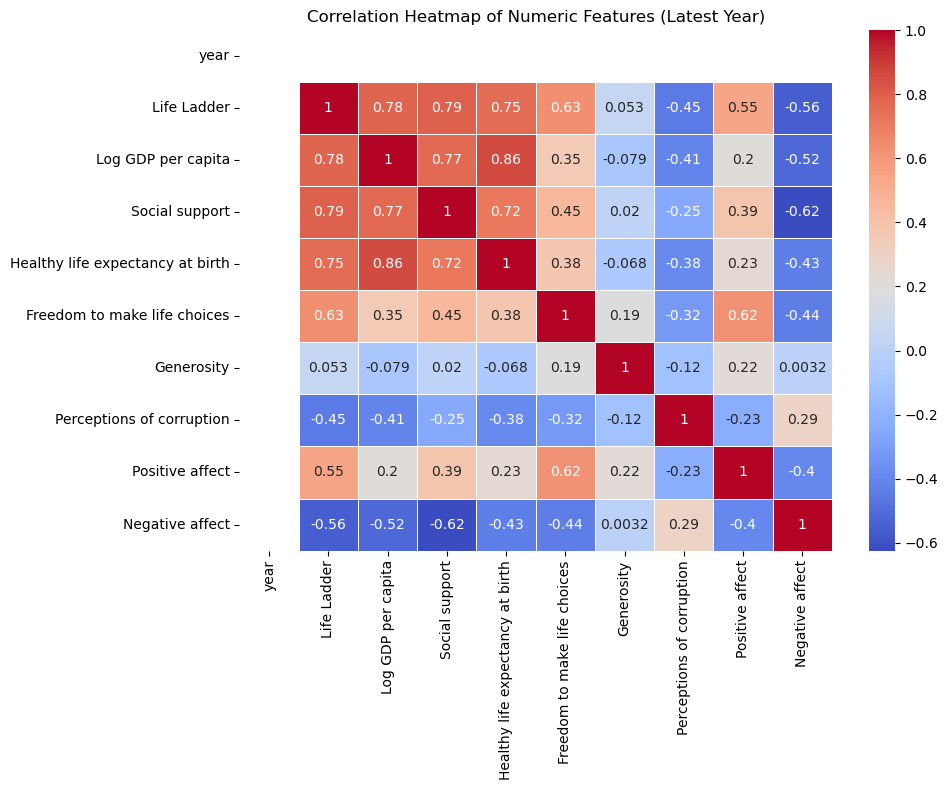

In [5]:
# Your code here:
corr = df[df['year'] == df['year'].max()].select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=True,      
    cmap='coolwarm',  
    linewidths=0.5  
)

plt.title('Correlation Heatmap of Numeric Features (Latest Year)')
plt.tight_layout()
plt.show()

### **Question 5: Create a residual plot for 'Life Ladder' prediction using 'Log GDP per capita'**
#### Hint: Use LinearRegression to predict, then subtract predictions from actuals and plot with plt.scatter()

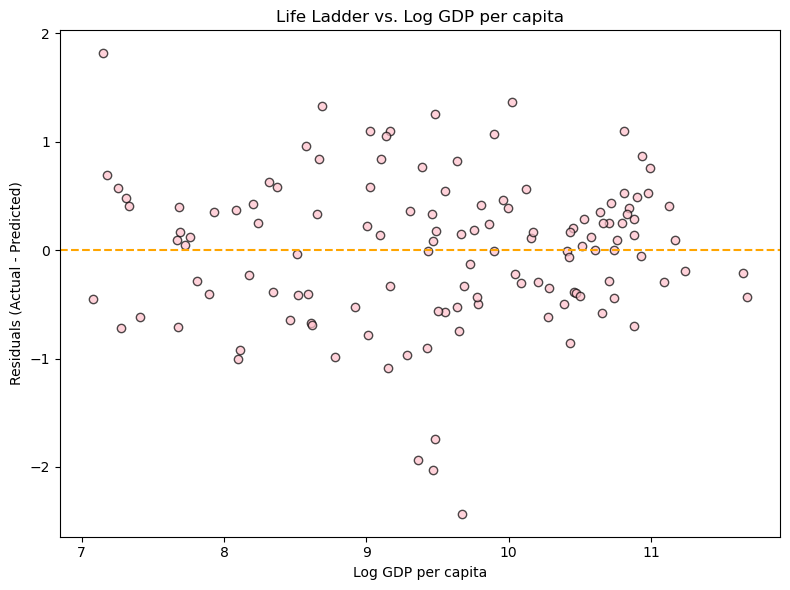

In [6]:
# Your code here:
df_latest = df[df['year'] == df['year'].max()]
df_latest = df_latest[['Log GDP per capita', 'Life Ladder']].dropna()

x = df_latest[['Log GDP per capita']]
y = df_latest['Life Ladder']

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(x, residuals, alpha=0.7, color='pink', edgecolor='black')
plt.axhline(0, color='orange', linestyle='--')

plt.xlabel('Log GDP per capita')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Life Ladder vs. Log GDP per capita')
plt.tight_layout()
plt.show()

### **Question 6: Create a line plot showing 'Healthy life expectancy at birth' over years for top 5 countries**
#### Hint: Group by 'Country name', take top 5 by average life expectancy, then use sns.lineplot() to show trends over time

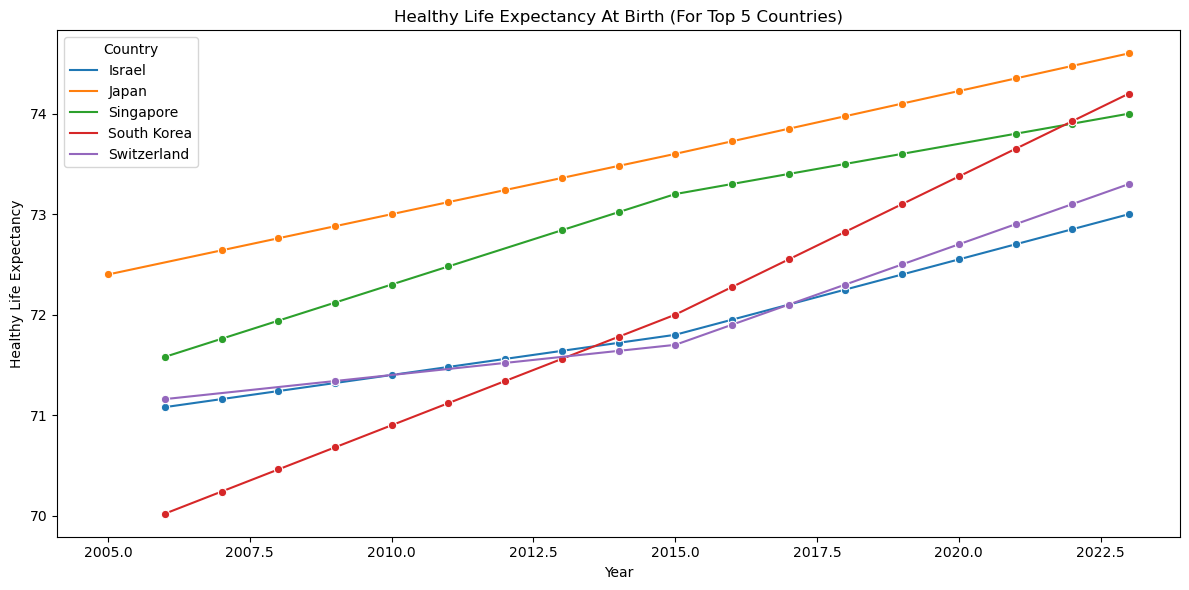

In [7]:
# Your code here:
top5 = df.groupby('Country name')['Healthy life expectancy at birth'].mean().sort_values(ascending=False).head(5)

df_top5 = df[df['Country name'].isin(top5.index)]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top5,
    x='year',
    y='Healthy life expectancy at birth',
    hue='Country name',
    marker='o'
)

plt.title('Healthy Life Expectancy At Birth (For Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Healthy Life Expectancy')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

### **Question 7: Create a bar chart of average 'Social support' for top 10 countries in 2023**
#### Hint: Filter the dataset for 2023, group by 'Country name', then plot the top 10 using bar chart

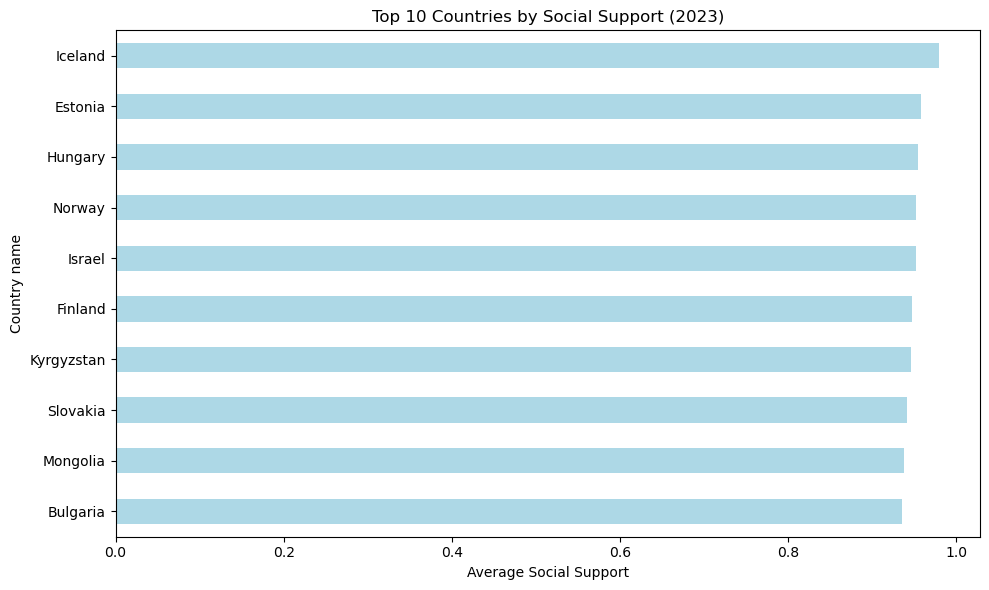

In [8]:
# Your code here:
plt.figure(figsize=(10, 6))

df_2023 = df[df['year'] == 2023]
avg_social = df_2023.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)
avg_social.plot(kind='barh', color='lightblue')

plt.xlabel('Average Social Support')
plt.title('Top 10 Countries by Social Support (2023)')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### **Question 8: Create a pie chart showing proportion of 'Country name' in the dataset (top 10 countries)**
#### Use df['Country name'].value_counts().head(10) and plt.pie() to show the most frequently appearing countries

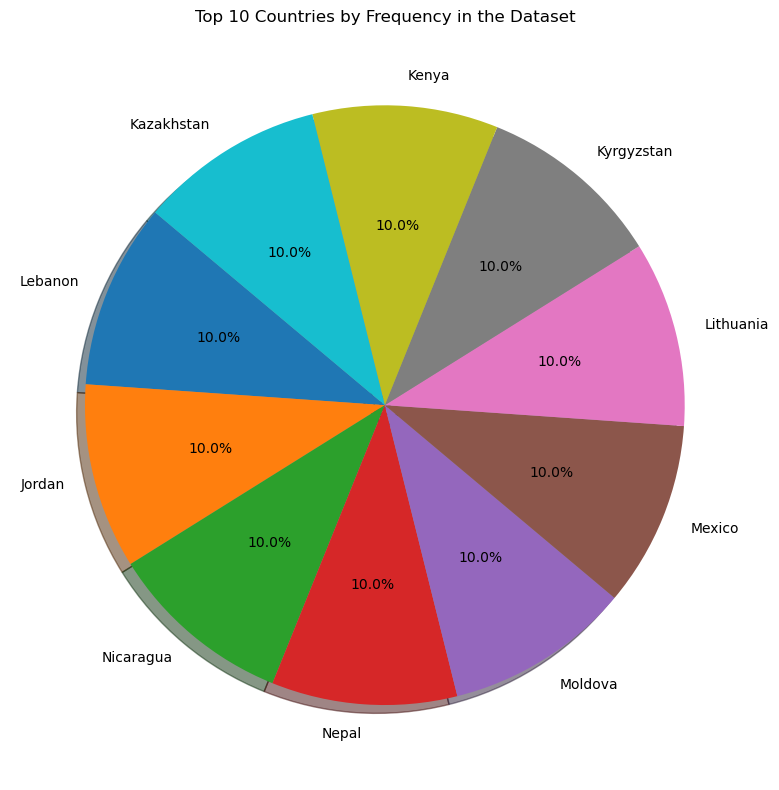

In [9]:
# Your code here:
top_countries = df['Country name'].value_counts().head(10)
plt.figure(figsize=(8, 8))

plt.pie(
    top_countries,                    
    labels=top_countries.index,      
    autopct='%1.1f%%',               
    startangle=140,                 
    shadow=True                     
)

plt.title('Top 10 Countries by Frequency in the Dataset')
plt.tight_layout()
plt.show()

### **Question 9: Perform Linear Regression to predict 'Life Ladder' using multiple predictors**
#### Hint: Use 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth' as X variables and fit a model

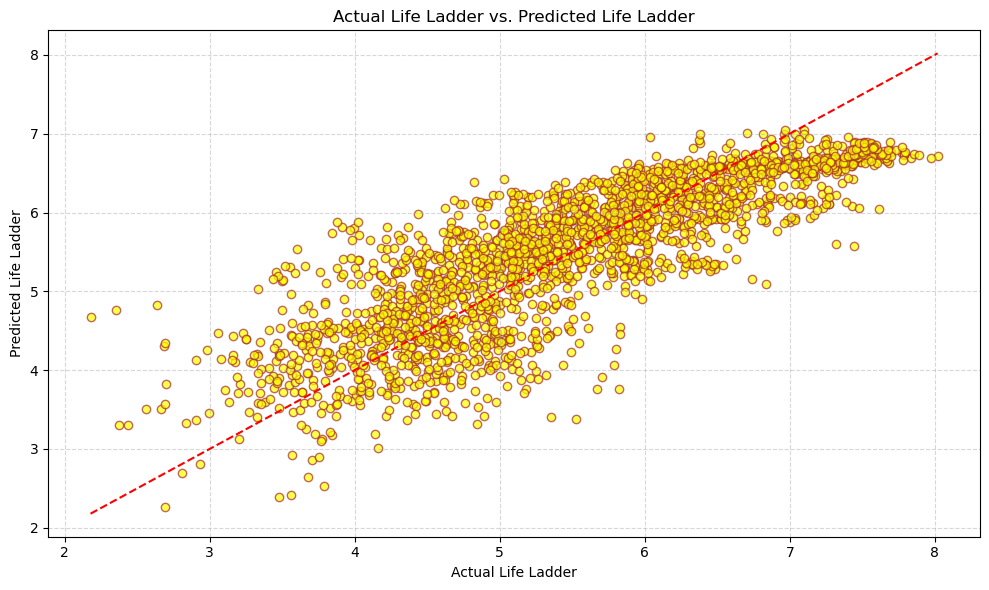

In [10]:
# Your code here:
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']
df_model = df[features + ['Life Ladder']].dropna()

x = df_model[features]
y = df_model['Life Ladder']
model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7, edgecolor='brown', color='yellow')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Actual Life Ladder vs. Predicted Life Ladder')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Question 10: Plot residuals from the model above**
#### Hint: Subtract predicted values from actual 'Life Ladder', then plot residuals vs predictions using plt.scatter()

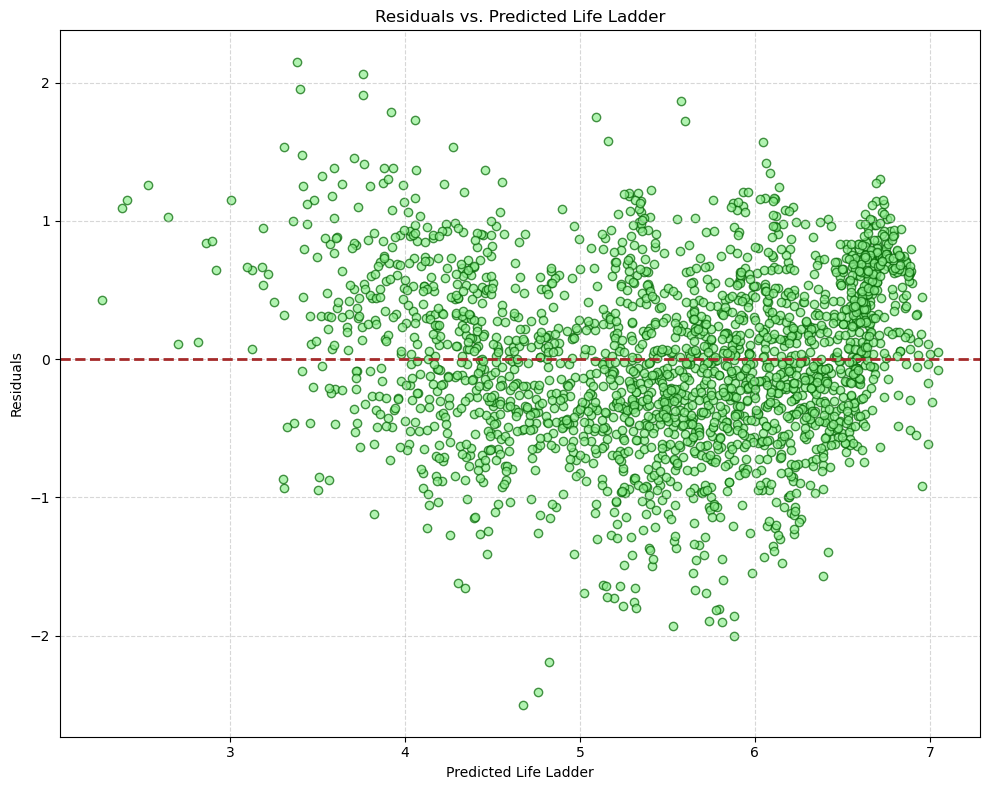

In [11]:
# Your code here:
residuals = y - y_pred

plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='darkgreen', color='lightgreen')
plt.axhline(y=0, color='brown', linestyle='--', linewidth=2)

plt.xlabel('Predicted Life Ladder')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Life Ladder')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()